NOTE: Each subsection's code can be independently run from top to bottom to produce figures.
# Data
## Sample Selection

In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars, stellar_density, gasmetals_density_profile, effective_yield, stellar_gas_densities, gasmetals_only, stellar_gas_metallicities, gas_mass, bimodal_check, starmetals_only, stellar_mass, get_stellar_age, gas_consumption

redshift = 2

In [2]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    OH_Re = f['OH_Re']
    OH_1kpc = f['OH_1kpc']
    OFe_Re = f['OFe_Re']
    OFe_1kpc = f['OFe_1kpc']
    FeH_gas_Re = f['FeH_gas_Re']
    FeH_gas_1kpc = f['FeH_gas_1kpc']
    OH_gas_Re = f['FeH_gas_Re']
    OH_gas_1kpc = f['FeH_gas_1kpc']

In [3]:
import warnings
warnings.filterwarnings('ignore')

starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) #-1.75)
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) #-1.75)

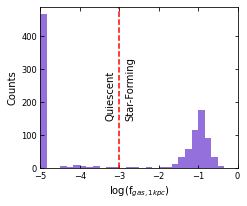

In [4]:
fig = plt.figure(1,figsize=(3.32,2.75), constrained_layout=True)
fig.clf()
fts = 20

big_hist = np.log10(gas_mass_1kpc / (gas_mass_1kpc + stellar_mass_1kpc))
big_hist[big_hist<-5] = -4.9

plt.hist(big_hist, bins=30, range=(-5.0, 0.0), density=False, color='mediumpurple')
plt.axvline(x=-3, linestyle='--', color='r')
plt.xlabel('log(f$_{gas, 1kpc}$)')#, fontsize=fts)
plt.ylabel('Counts')#, fontsize=fts)
plt.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize='small')
plt.xlim(-5, 0)


#labels
plt.text(-3.35, 150, 'Quiescent',rotation=90)
plt.text(-2.85, 150, 'Star-Forming', rotation=90)

# plt.savefig('2022 FIGURES/bimodal.png', dpi=300)

plt.show()

# Global Measurements
## Scaling Relations

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import table

In [15]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars, stellar_density, gasmetals_density_profile, effective_yield, stellar_gas_densities, gasmetals_only, stellar_gas_metallicities, gas_mass, bimodal_check, starmetals_only, stellar_mass, get_stellar_age, gas_consumption

redshift = 2

In [16]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    FeH_Re = f['FeH_Re'][:]
    MgFe_Re = f['MgFe_Re'][:]
    MgH_Re = f['MgH_Re'][:]
    FeH_1kpc = f['FeH_1kpc'][:]
    MgFe_1kpc = f['MgFe_1kpc'][:]
    MgH_1kpc = f['MgH_1kpc'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    OH_Re = f['OH_Re']
    OH_1kpc = f['OH_1kpc']
    OFe_Re = f['OFe_Re']
    OFe_1kpc = f['OFe_1kpc']
    FeH_gas_Re = f['FeH_gas_Re']
    FeH_gas_1kpc = f['FeH_gas_1kpc']
    OH_gas_Re = f['FeH_gas_Re']
    OH_gas_1kpc = f['FeH_gas_1kpc']
    percentile_age = f['percentile_age'][:]

In [17]:
import warnings
warnings.filterwarnings('ignore')

starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) #-1.75)
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) #-1.75)

In [18]:
# credit: https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = colors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [19]:
# start with a dictionary
sample_template = {
    'name': 'galaxy_name       ',
    'redshift': np.nan,
    'logMstar': np.nan,
    'Re': np.nan,              # kpc
    'x_err': np.nan,
    'age': np.nan,              # Gyr
    'age_err': np.nan,
    '[Fe/H]': np.nan,
    '[Fe/H]_err': np.nan,
    '[Mg/Fe]': np.nan,
    '[Mg/Fe]_err': np.nan,
    '[Mg/H]': np.nan,
    '[Mg/H]_err': np.nan,
}

# convert each value to a list of 100 identical objects
for k, v in sample_template.items():
    sample_template[k] = [v]*100

# convert dictionary of lists to a Table object 
sample_template = table.Table(sample_template)


sample_template[0:5]

name,redshift,logMstar,Re,x_err,age,age_err,[Fe/H],[Fe/H]_err,[Mg/Fe],[Mg/Fe]_err,[Mg/H],[Mg/H]_err
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
galaxy_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
galaxy_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
galaxy_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
galaxy_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
galaxy_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [20]:
########################
# Kriek et al. (2016)
########################
# 1 galaxy, MOSFIRE spectrum, fit with Alf

kriek16 = sample_template[0:1].copy()
kriek16.meta['label'] = 'z~2 (Kriek et al. 2016)'

kriek16['name'] = 'COSMOS-11494'
kriek16['redshift'] = 2.1
kriek16['logMstar'] = 11.5
kriek16['Re'] = 2.1
kriek16['x_err'] = 0.1
kriek16['age'] = 2.71
kriek16['age_err'] = 0.22
kriek16['[Fe/H]'] = -0.25
kriek16['[Fe/H]_err'] = 0.11
kriek16['[Mg/Fe]'] = 0.59
kriek16['[Mg/Fe]_err'] = 0.11
kriek16['[Mg/H]'] = kriek16['[Mg/Fe]'] + kriek16['[Fe/H]']
kriek16['[Mg/H]_err'] = np.sqrt( kriek16['[Mg/Fe]_err']**2 + kriek16['[Fe/H]_err']**2 )

# print out table
kriek16



name,redshift,logMstar,Re,x_err,age,age_err,[Fe/H],[Fe/H]_err,[Mg/Fe],[Mg/Fe]_err,[Mg/H],[Mg/H]_err
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
COSMOS-11494,2.1,11.5,2.1,0.1,2.71,0.22,-0.25,0.11,0.59,0.11,0.33999999999999997,0.15556349186104046


In [21]:
########################
# Kriek et al. (2019)
########################
# 5 galaxies, LRIS+MOSFIRE spectra, fit with Alf

kriek19 = sample_template[0:3].copy()
kriek19.meta['label'] = 'z~1.4 (Kriek et al. 2019)'

kriek19['name'] = [214340, 213931, 214695] #217249, 213947, 
kriek19['redshift'] = [1.418, 1.399, 1.396] #1.377, 1.397, 
kriek19['logMstar'] = [10.80, 11.73, 11.18] #10.61, 10.87, 
kriek19['Re'] = 10**np.array([0.52, 0.62, 0.29]) #-0.3, -0.2, 
kriek19['x_err'] = [0.1, 0.1, 0.1]
kriek19['age'] = [3.8, 3.1, 4.5] #3.0, 3.0, 
kriek19['age_err'] = [3.0, 0.2, 2.1] # mean of upper and lower uncertainty #0.5, 0.6, 
kriek19['[Fe/H]'] = [-0.42, -0.27, -0.20] #-1.03, -0.89, 
kriek19['[Fe/H]_err'] = [0.20, 0.07, 0.20] # mean of upper and lower uncertainty #0.37, 0.46, 
kriek19['[Mg/Fe]'] = [0.22, 0.44, 0.28] #0.52, 0.57, 
kriek19['[Mg/Fe]_err'] = [0.17, 0.08, 0.15] #0.32, 0.28, 
kriek19['[Mg/H]'] = kriek19['[Mg/Fe]'] + kriek19['[Fe/H]']
kriek19['[Mg/H]_err'] = np.sqrt( kriek19['[Mg/Fe]_err']**2 + kriek19['[Fe/H]_err']**2 )

# following the paper, we discard the first two galaxies because very young
# and with uncertain abundance measurements

# kriek19_discarded = kriek19[0:2]
# kriek19_discarded.meta['label'] = 'Kriek et al. (2019) discarded'
# kriek19 = kriek19[2:]

# print out table
kriek19



name,redshift,logMstar,Re,x_err,age,age_err,[Fe/H],[Fe/H]_err,[Mg/Fe],[Mg/Fe]_err,[Mg/H],[Mg/H]_err
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
214340,1.418,10.8,3.311311214825911,0.1,3.8,3.0,-0.42,0.2,0.22,0.17,-0.19999999999999998,0.2624880949681338
213931,1.399,11.73,4.168693834703354,0.1,3.1,0.2,-0.27,0.07,0.44,0.08,0.16999999999999998,0.1063014581273465
214695,1.396,11.18,1.9498445997580451,0.1,4.5,2.1,-0.2,0.2,0.28,0.15,0.08000000000000002,0.25


In [22]:
########################
# Jafariyazani et al. (2020)
########################
# 1 galaxy, MOSFIRE spectrum, fit with Alf

jafa20 = sample_template[0:1].copy()
jafa20.meta['label'] = 'z~2 (Jafariyazani et al. 2020)'

jafa20['name'] = 'MRG-M0138'
jafa20['redshift'] = 1.98
jafa20['logMstar'] = 11.69
jafa20['Re'] = 4.8
jafa20['x_err'] = 0.1
jafa20['age'] = 1.37
jafa20['age_err'] = 0.11
jafa20['[Fe/H]'] = 0.26
jafa20['[Fe/H]_err'] = 0.04
jafa20['[Mg/Fe]'] = 0.51
jafa20['[Mg/Fe]_err'] = 0.05
jafa20['[Mg/H]'] = jafa20['[Mg/Fe]'] + jafa20['[Fe/H]']
jafa20['[Mg/H]_err'] = np.sqrt( jafa20['[Mg/Fe]_err']**2 + jafa20['[Fe/H]_err']**2 )

# print out table
jafa20



name,redshift,logMstar,Re,x_err,age,age_err,[Fe/H],[Fe/H]_err,[Mg/Fe],[Mg/Fe]_err,[Mg/H],[Mg/H]_err
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
MRG-M0138,1.98,11.69,4.8,0.1,1.37,0.11,0.26,0.04,0.51,0.05,0.77,0.06403124237432849


In [23]:
# set the marker properties for the plots
elinewidth = 1

kriek16.meta['color'] = 'k'
kriek16.meta['markersize'] = 12-7
kriek16.meta['marker'] = 'D'
kriek16.meta['alpha'] = 0.8
kriek16.meta['zorder'] = 100
kriek16.meta['elinewidth'] = elinewidth

kriek19.meta['color'] = 'k'
kriek19.meta['markersize'] = 12-8
kriek19.meta['marker'] = 'v'
kriek19.meta['alpha'] = 0.8
kriek19.meta['zorder'] = 100
kriek19.meta['elinewidth'] = elinewidth


jafa20.meta['color'] = 'k'
jafa20.meta['markersize'] = 12-7
jafa20.meta['marker'] = 's'
jafa20.meta['alpha'] = 0.8
jafa20.meta['zorder'] = 100
jafa20.meta['elinewidth'] = elinewidth

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'


In [24]:
# put z~2 samples together
samples = [kriek16, kriek19, jafa20]#, carn21, bev21] #, kriek19_discarded, jafa20]

# this one is to suppress the line connecting points
for s in samples:
    s.meta['linestyle'] = ''

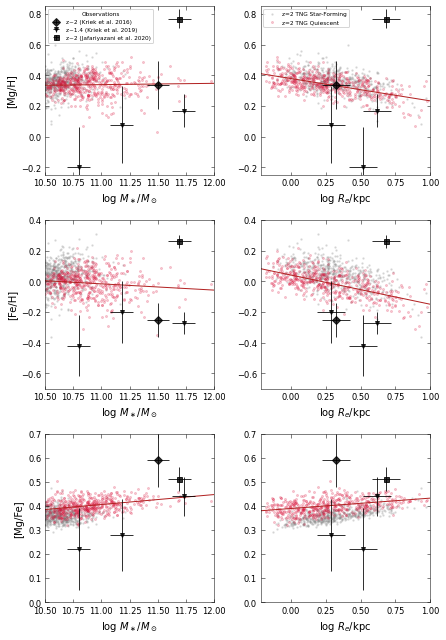

In [16]:

# plot of abundances vs stellar mass and effective size

fig, axs = plt.subplots(3, 2, figsize=(6.3,9), sharey='row')
markersize = 3
alpha = 0.2
linewidth = 1

def func(x, m, b):
    y = m*x + b
    return y

params = []
color = 'firebrick'

##### STELLAR MASS #######################################################################

# [Mg/Fe]
##########

# z=2 galaxies
axs[2][0].plot(total_mass[starforming_selection], MgFe_Re[starforming_selection], '.', color='gray',
           alpha=alpha, label='z='+str(redshift)+' TNG Star-Forming', markersize=markersize, zorder=0)
axs[2][0].plot(total_mass[quiescent_selection], MgFe_Re[quiescent_selection], '.', color='crimson',
           alpha=alpha, label='z='+str(redshift)+' TNG Quiescent', markersize=markersize+1, zorder=1)

optParam, pcov = curve_fit(func, total_mass[quiescent_selection], MgFe_Re[quiescent_selection])
params.append(optParam)
xx = np.array([10.5, 12])
axs[2][0].plot(xx, func(xx, *optParam), '-', color=color, linewidth=linewidth)

obsarray = []
# observations
for s in samples:
    thing = axs[2][0].errorbar(s['logMstar'], s['[Mg/Fe]'], xerr=s['x_err'], yerr=s['[Mg/Fe]_err'], **s.meta)
    obsarray.append(thing)

axs[2][0].set(xlabel=r'log $M_\ast/M_\odot$', ylabel='[Mg/Fe]',
      ylim=[0, 0.7], xlim=[10.5, 12])



# [Fe/H]
##########

# z=2 galaxies
axs[1][0].plot(total_mass[starforming_selection], FeH_Re[starforming_selection], '.', color='gray',
           alpha=alpha, markersize=markersize, zorder=0)
axs[1][0].plot(total_mass[quiescent_selection], FeH_Re[quiescent_selection], '.', color='crimson',
           alpha=alpha, markersize=markersize+1, zorder=1)

optParam, pcov = curve_fit(func, total_mass[quiescent_selection], FeH_Re[quiescent_selection])
params.append(optParam)
xx = np.array([10.5, 12])
axs[1][0].plot(xx, func(xx, *optParam), '-', color=color, linewidth=linewidth)

# observations
for s in samples:
    axs[1][0].errorbar(s['logMstar'], s['[Fe/H]'], xerr=s['x_err'], yerr=s['[Fe/H]_err'], **s.meta)

axs[1][0].set(xlabel=r'log $M_\ast/M_\odot$', ylabel='[Fe/H]',
      ylim=[-0.7, 0.4], xlim=[10.5, 12])


# [Mg/H]
##########

# z=2 galaxies
axs[0][0].plot(total_mass[starforming_selection], MgH_Re[starforming_selection], '.', color='gray',
           label='z='+str(redshift)+' TNG Star-Forming', alpha=alpha, markersize=markersize, zorder=0)
axs[0][0].plot(total_mass[quiescent_selection], MgH_Re[quiescent_selection], '.', color='crimson',
           label='z='+str(redshift)+' TNG Quiescent', alpha=alpha, markersize=markersize+1, zorder=1)

optParam, pcov = curve_fit(func, total_mass[quiescent_selection], MgH_Re[quiescent_selection])
params.append(optParam)
xx = np.array([10.5, 12])
axs[0][0].plot(xx, func(xx, *optParam), '-', color=color, linewidth=linewidth)

# observations
for s in samples:
    axs[0][0].errorbar(s['logMstar'], s['[Mg/H]'], xerr=s['x_err'], yerr=s['[Mg/H]_err'], **s.meta)

axs[0][0].set(xlabel=r'log $M_\ast/M_\odot$', ylabel='[Mg/H]',
      ylim=[0.85-1.1, 0.85], xlim=[10.5, 12])


##### EFFECTIVE SIZE ########################################################################

# [Mg/Fe]
##########

# z=2 galaxies
axs[2][1].plot(np.log10(halfmass_radius[starforming_selection]), MgFe_Re[starforming_selection], '.', color='gray', 
            alpha=alpha, label='z='+str(redshift)+' TNG Star-Forming', markersize=markersize, zorder=0)
axs[2][1].plot(np.log10(halfmass_radius[quiescent_selection]), MgFe_Re[quiescent_selection], '.', color='crimson', 
            alpha=alpha, label='z='+str(redshift)+' TNG Star-Forming', markersize=markersize+1, zorder=1)

optParam, pcov = curve_fit(func, np.log10(halfmass_radius[quiescent_selection]), MgFe_Re[quiescent_selection])
params.append(optParam)
xx = np.array([-0.22, 1.0])
axs[2][1].plot(xx, func(xx, *optParam), '-', color=color, linewidth=linewidth)

# observations
for s in samples:
    axs[2][1].errorbar(np.log10(s['Re']), s['[Mg/Fe]'], xerr=s['x_err'], yerr=s['[Mg/Fe]_err'], **s.meta)

axs[2][1].set(xlabel=r'log $R_e$/kpc', ylabel=None,
      ylim=[0, 0.7], xlim=[-0.22, 1.0])



# [Fe/H]
##########

# z=2 galaxies
axs[1][1].plot(np.log10(halfmass_radius[starforming_selection]), FeH_Re[starforming_selection], '.', color='gray', 
            alpha=alpha, markersize=markersize, zorder=0)
axs[1][1].plot(np.log10(halfmass_radius[quiescent_selection]), FeH_Re[quiescent_selection], '.', color='crimson', 
            alpha=alpha, markersize=markersize+1, zorder=1)

optParam, pcov = curve_fit(func, np.log10(halfmass_radius[quiescent_selection]), FeH_Re[quiescent_selection])
params.append(optParam)
xx = np.array([-0.22, 1.0])
axs[1][1].plot(xx, func(xx, *optParam), '-', color=color, linewidth=linewidth)

# observations
for s in samples:
    axs[1][1].errorbar(np.log10(s['Re']), s['[Fe/H]'], xerr=s['x_err'], yerr=s['[Fe/H]_err'], **s.meta)

axs[1][1].set(xlabel=r'log $R_e$/kpc', ylabel=None,
      ylim=[-0.7, 0.4], xlim=[-0.22, 1.0])


# [Mg/H]
##########

# z=2 galaxies
tngsf, = axs[0][1].plot(np.log10(halfmass_radius[starforming_selection]), MgH_Re[starforming_selection], '.', color='gray', 
            label='z='+str(redshift)+' TNG Star-Forming', alpha=alpha, markersize=markersize, zorder=0)
tngq, = axs[0][1].plot(np.log10(halfmass_radius[quiescent_selection]), MgH_Re[quiescent_selection], '.', color='crimson', 
            label='z='+str(redshift)+' TNG Quiescent', alpha=alpha, markersize=markersize+1, zorder=1)

optParam, pcov = curve_fit(func, np.log10(halfmass_radius[quiescent_selection]), MgH_Re[quiescent_selection])
params.append(optParam)
xx = np.array([-0.22, 1.0])
axs[0][1].plot(xx, func(xx, *optParam), '-', color=color, linewidth=linewidth)

# observations
for s in samples:
    axs[0][1].errorbar(np.log10(s['Re']), s['[Mg/H]'], xerr=s['x_err'], yerr=s['[Mg/H]_err'], **s.meta)

axs[0][1].set(xlabel=r'log $R_e$/kpc', ylabel=None,
      ylim=[0.85-1.1, 0.85], xlim=[-0.22, 1.0])

plt.rcParams['axes.labelsize'] = fts
for bip in axs:
    for bop in bip:
        bop.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True, width=0.5)
        
# legend
axs[0][0].legend(title='Observations', handles=[obsarray[0], obsarray[1], obsarray[2]], loc='upper left', fontsize=ftsss, title_fontsize=ftsss).set_zorder(200)
axs[0][1].legend(handles=[tngsf, tngq], loc='upper left', fontsize=ftsss).set_zorder(200)

for row in axs:
    for ax in row:
        ax.yaxis.set_tick_params(labelbottom=True)
        for side in ax.spines.keys(): 
            ax.spines[side].set_linewidth(0.5)
        
fig.tight_layout()

# plt.savefig('2022 FIGURES\z2_bigcheddar.png', dpi=300, bbox_inches='tight')
plt.show()

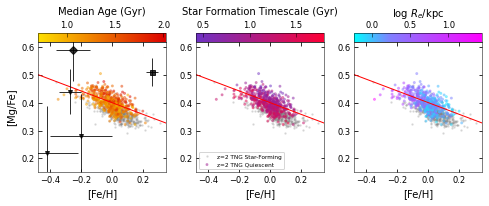

In [47]:

# [Mg/Fe] vs [Fe/H]
####################
fig, axes = plt.subplots(1, 3, figsize=(6.9, 2.95), sharey='row')
ax1 = axes[0]
ax2 = axes[1]

def func(x, m, b):
    y = m*x + b
    return y

markersize = 3
alpha = 0.2

### MEDIAN AGE ########
vmin_med = min(median_age[quiescent_selection])
vmax_med = max(median_age[quiescent_selection])
hexlist = ['#ffe200', '#dd0000']
colormap_med = get_continuous_cmap(hexlist)
norm_med = colors.Normalize(vmin=vmin_med, vmax=vmax_med)
color_med = colormap_med(norm_med(median_age[quiescent_selection]))

### 90 - 10 AGE ########
vmin_age = min(percentile_age[quiescent_selection])
vmax_age = max(percentile_age[quiescent_selection])
hexlist = ['#6d33c6', '#Ff0036']# '#fb2047']
colormap_age = get_continuous_cmap(hexlist)
norm_age = colors.Normalize(vmin=vmin_age, vmax=vmax_age)
color_age = colormap_age(norm_age(percentile_age[quiescent_selection]))

### EFFECTIVE RADIUS ########
radius_quiescent = np.log10(np.array(halfmass_radius[quiescent_selection]))
vmin_r = min(radius_quiescent)
vmax_r = max(radius_quiescent)
vcenter = np.median(radius_quiescent)
colormap_r = plt.get_cmap('cool')
# norm_r = colors.Normalize(vmin=vmin_r, vmax=vmax_r)
norm_r = colors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin_r, vmax=vmax_r)
color_r = colormap_r(norm_r(radius_quiescent))

colormaps = [colormap_med, colormap_age, colormap_r]
colorlist = [color_med, color_age, color_r]
normlist = [norm_med, norm_age, norm_r]
cbar_labels = ['Median Age (Gyr)', 'Star Formation Timescale (Gyr)', 'log $R_e$/kpc']


i = -1
data = []
tng2big = []
xlims = [-0.48, 0.35]
ylims = [0.15, 0.62]

#model fit
optParam, pcov = curve_fit(func, FeH_Re[quiescent_selection][100:-100], MgFe_Re[quiescent_selection][100:-100])
xx = np.array(xlims)
for ax in axes:
    i += 1
    # plot TNG markers
    tng1, = ax.plot(FeH_Re[starforming_selection], MgFe_Re[starforming_selection], '.', color='gray',
               alpha=alpha, label='z='+str(redshift)+' TNG Star-Forming', markersize=markersize, zorder=0)
    tng2 = ax.scatter(FeH_Re[quiescent_selection], MgFe_Re[quiescent_selection], marker='.', cmap=colormaps[i], c=colorlist[i],
                alpha=alpha+0.2, label='z='+str(redshift)+' TNG Quiescent', s=(markersize+1)**2, zorder=1)
    tng2big.append(tng2)

    # plot TNG quiescent model
    ax.plot(xx, func(xx, *optParam), '-', color='r', linewidth=1)

    # observations
    if i==0:
        for s in samples:
            thing = ax.errorbar(s['[Fe/H]'], s['[Mg/Fe]'], xerr=s['[Fe/H]_err'], yerr=s['[Mg/Fe]_err'], **s.meta)
            data.append(thing)

    # labels
    if i==0:
        ax.set(xlabel='[Fe/H]', ylabel='[Mg/Fe]',
              ylim=ylims, xlim=xlims)
    else:
        ax.set(xlabel='[Fe/H]', ylabel=None,
              ylim=ylims, xlim=xlims)
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize='small')
    ax.yaxis.set_tick_params(labelbottom=True)
    
    # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="7%", pad=0.0)
    sm = plt.cm.ScalarMappable(cmap=colormaps[i], norm=normlist[i])
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
    cbar.outline.set_linewidth(0.5)
    cbar.set_label(cbar_labels[i], rotation=0, labelpad=-35)
    cbar.ax.tick_params(direction='in', labeltop=True, labelbottom=False, top=True, bottom=False, labelsize='small', width=0.5)
    if i==2:
        cbar.set_ticks([0.0, 0.5, 1.0])
        cbar.set_ticklabels(['0.0', '0.5', '1.0'])


# legend
ax2.legend(handles=[tng1, tng2big[1]], loc='lower left', fontsize='xx-small').set_zorder(200)

for ax in axes:
    for side in ax.spines.keys(): 
        ax.spines[side].set_linewidth(0.5)

fig.tight_layout(w_pad=0.9)

# plt.savefig('2022 FIGURES\z2_MgFeFeH_three.png', dpi=300, bbox_inches='tight')
plt.show()

## Redshift Evolution

In [18]:
from astropy import table
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars, stellar_density, gasmetals_density_profile, effective_yield, stellar_gas_densities, gasmetals_only, stellar_gas_metallicities, gas_mass, bimodal_check, starmetals_only, stellar_mass, get_stellar_age, gas_consumption

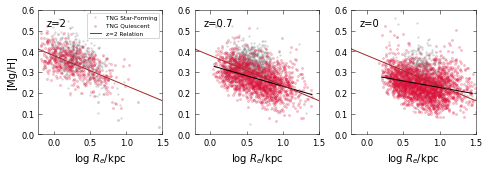

In [20]:
import warnings
warnings.filterwarnings('ignore')

# [Mg/Fe] vs [Fe/H]
####################
fig, axes = plt.subplots(1, 3, figsize=(6.9,2.5), sharey='row') #21, 6
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

def func(x, m, b):
    y = m*x + b
    return y

markersize = 3
alpha = 0.2

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'

i = -1
data = []
tng2big = []
xlims = [-0.22, 1.5]
ylims = [0.0, 0.6]
redshiftlist = [2, 0.7, 0]
criteria = -3 #cutoff for star-forming/quiescent
xlabel = r'log $R_e$/kpc'
ylabel = '[Mg/H]'
cbarlabel = r'log $R_e$/kpc'
color = 'brown'
xtrend = [0, 0.05, 0.2, 1.4, 1.45]
trends = []

for ax in axes:
    i += 1
    
    # get redshift data
    redshift = redshiftlist[i]
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
        ids = f['ids'][:]
        median_age = f['median_age'][:]
        halfmass_radius = f['halfmass_radius'][:]
        total_mass = f['total_mass'][:]
        FeH_Re = f['FeH_Re'][:]
        MgFe_Re = f['MgFe_Re'][:]
        MgH_Re = f['MgH_Re'][:]
        gas_mass_1kpc = f['gas_mass_1kpc'][:]
        stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>criteria)
    quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=criteria)

    
    # get x and y points
    xx_quiescent = np.log10(np.array(halfmass_radius[quiescent_selection]))
    yy_quiescent = MgH_Re[quiescent_selection]
    xx_sf = np.log10(np.array(halfmass_radius[starforming_selection]))
    yy_sf = MgH_Re[starforming_selection]
    
    # plot TNG markers
    tng1, = ax.plot(xx_sf, yy_sf, '.', color='gray',
               alpha=alpha, label='TNG Star-Forming', markersize=markersize, zorder=0)
    tng2 = ax.scatter(xx_quiescent, yy_quiescent, marker='.', color='crimson',
               alpha=alpha, label='TNG Quiescent', s=(markersize+1)**2, zorder=1)
    tng2big.append(tng2)

    # plot TNG quiescent model
    if i == 0: #z=2
        optParam, pcov = curve_fit(func, xx_quiescent, yy_quiescent)
        xx = np.array(xlims)
    else:
        optParam2, pcov2 = curve_fit(func, xx_quiescent, yy_quiescent)
        xx2 = np.array([xtrend[i], xtrend[i+2]])
        thing, = ax.plot(xx2, func(xx2, *optParam2), '-', color='k', linewidth=1, label='z='+str(redshift)+' Relation')
        trends.append(thing)
    z2trend, = ax.plot(xx, func(xx, *optParam), '-', color=color, linewidth=1, label='z=2 Relation')

    # labels
    if i==0:
        ax.set(xlabel=xlabel, ylabel=ylabel,
              ylim=ylims, xlim=xlims)
    else:
        ax.set(xlabel=xlabel, ylabel=None,
              ylim=ylims, xlim=xlims)
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5)
    ax.text(0.07, 0.87, 'z='+str(redshift), transform=ax.transAxes, fontsize=fts)
    ax.yaxis.set_tick_params(labelbottom=True)

    # skinny boxes
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(0.5)
    

# legend
ax1.legend(handles=[tng1, tng2big[1], z2trend], loc='upper right', fontsize=ftsss).set_zorder(200)


fig.tight_layout(w_pad=0.9)

# plt.savefig('2022 FIGURES\z0-2_MgHRe.png', dpi=300, bbox_inches='tight')
plt.show()

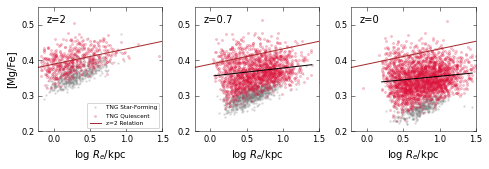

In [21]:
import warnings
warnings.filterwarnings('ignore')

# [Mg/Fe] vs [Fe/H]
####################
fig, axes = plt.subplots(1, 3, figsize=(6.9,2.45), sharey='row') #21, 6
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

def func(x, m, b):
    y = m*x + b
    return y

markersize = 3
alpha = 0.2

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'

i = -1
data = []
tng2big = []
xlims = [-0.22, 1.5]
ylims = [0.2, 0.55]
redshiftlist = [2, 0.7, 0]
criteria = -3 #cutoff for star-forming/quiescent
xlabel = r'log $R_e$/kpc'
ylabel = '[Mg/Fe]'
cbarlabel = r'log $R_e$/kpc'
color = 'brown'
xtrend = [0, 0.05, 0.2, 1.4, 1.45]
trends = []

for ax in axes:
    i += 1
    
    # get redshift data
    redshift = redshiftlist[i]
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
        median_age = f['median_age'][:]
        halfmass_radius = f['halfmass_radius'][:]
        total_mass = f['total_mass'][:]
        FeH_Re = f['FeH_Re'][:]
        MgFe_Re = f['MgFe_Re'][:]
        MgH_Re = f['MgH_Re'][:]
        gas_mass_1kpc = f['gas_mass_1kpc'][:]
        stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>criteria)
    quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=criteria)
    
    # get x and y points
    xx_quiescent = np.log10(np.array(halfmass_radius[quiescent_selection]))
    yy_quiescent = MgFe_Re[quiescent_selection]
    xx_sf = np.log10(np.array(halfmass_radius[starforming_selection]))
    yy_sf = MgFe_Re[starforming_selection]
    
    # plot TNG markers
    tng1, = ax.plot(xx_sf, yy_sf, '.', color='gray',
               alpha=alpha, label='TNG Star-Forming', markersize=markersize, zorder=0)
    tng2 = ax.scatter(xx_quiescent, yy_quiescent, marker='.', color='crimson',
               alpha=alpha, label='TNG Quiescent', s=(markersize+1)**2, zorder=1)
    tng2big.append(tng2)

    # plot TNG quiescent model
    if i == 0: #z=2
        optParam, pcov = curve_fit(func, xx_quiescent, yy_quiescent)
        xx = np.array(xlims)
    else:
        optParam2, pcov2 = curve_fit(func, xx_quiescent, yy_quiescent)
        xx2 = np.array([xtrend[i], xtrend[i+2]])
        thing, = ax.plot(xx2, func(xx2, *optParam2), '-', color='k', linewidth=1, label='z='+str(redshift)+' Relation')
        trends.append(thing)
    z2trend, = ax.plot(xx, func(xx, *optParam), '-', color=color, linewidth=1, label='z=2 Relation')

    # labels
    if i==0:
        ax.set(xlabel=xlabel, ylabel=ylabel,
              ylim=ylims, xlim=xlims)
    else:
        ax.set(xlabel=xlabel, ylabel=None,
              ylim=ylims, xlim=xlims)
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5)
    ax.text(0.07, 0.87, 'z='+str(redshift), transform=ax.transAxes, fontsize=fts)
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.set_yticks([0.2, 0.3, 0.4, 0.5], minor=False)
    ax.set_yticklabels(['0.2', '0.3', '0.4', '0.5'])

    # skinny boxes
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(0.5)

# legend
ax1.legend(handles=[tng1, tng2big[1], z2trend], loc='lower right', fontsize=ftsss).set_zorder(200)

fig.tight_layout(w_pad=0.9)

# plt.savefig('2022 FIGURES\z0-2_MgFeRe.png', dpi=300, bbox_inches='tight')
plt.show()

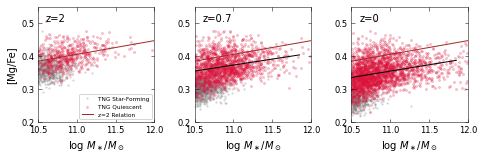

In [22]:
import warnings
warnings.filterwarnings('ignore')

# [Mg/Fe] vs [Fe/H]
####################
fig, axes = plt.subplots(1, 3, figsize=(6.9,2.38), sharey='row') #21, 6
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

def func(x, m, b):
    y = m*x + b
    return y

markersize = 3
alpha = 0.2

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'

i = -1
data = []
tng2big = []
xlims = [10.5, 12]
ylims = [0.2, 0.55]
redshiftlist = [2, 0.7, 0]
criteria = -3 #cutoff for star-forming/quiescent
xlabel = r'log $M_\ast/M_\odot$'
ylabel = '[Mg/Fe]'
cbarlabel = r'log $R_e$/kpc'
color = 'brown'
xtrend = [0, 0.05, 0.2, 1.4, 1.45]
trends = []

for ax in axes:
    i += 1
    
    # get redshift data
    redshift = redshiftlist[i]
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
        median_age = f['median_age'][:]
        halfmass_radius = f['halfmass_radius'][:]
        total_mass = f['total_mass'][:]
        FeH_Re = f['FeH_Re'][:]
        MgFe_Re = f['MgFe_Re'][:]
        MgH_Re = f['MgH_Re'][:]
        gas_mass_1kpc = f['gas_mass_1kpc'][:]
        stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>criteria)
    quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=criteria)
    
    # get x and y points
    xx_quiescent = total_mass[quiescent_selection]
    yy_quiescent = MgFe_Re[quiescent_selection]
    xx_sf = total_mass[starforming_selection]
    yy_sf = MgFe_Re[starforming_selection]
    
    # plot TNG markers
    tng1, = ax.plot(xx_sf, yy_sf, '.', color='gray',
               alpha=alpha, label='TNG Star-Forming', markersize=markersize, zorder=0)
    tng2 = ax.scatter(xx_quiescent, yy_quiescent, marker='.', color='crimson',
               alpha=alpha, label='TNG Quiescent', s=(markersize+1)**2, zorder=1)
    tng2big.append(tng2)

    # plot TNG quiescent model
    if i == 0: #z=2
        optParam, pcov = curve_fit(func, xx_quiescent, yy_quiescent)
        xx = np.array(xlims)
    else:
        optParam2, pcov2 = curve_fit(func, xx_quiescent, yy_quiescent)
        xx2 = np.array([10.5, 11.85])
        thing, = ax.plot(xx2, func(xx2, *optParam2), '-', color='k', linewidth=1, label='z='+str(redshift)+' Relation')
        trends.append(thing)
    z2trend, = ax.plot(xx, func(xx, *optParam), '-', color=color, linewidth=1, label='z=2 Relation')

    # labels
    if i==0:
        ax.set(xlabel=xlabel, ylabel=ylabel,
              ylim=ylims, xlim=xlims)
    else:
        ax.set(xlabel=xlabel, ylabel=None,
              ylim=ylims, xlim=xlims)
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5)
    ax.text(0.07, 0.87, 'z='+str(redshift), transform=ax.transAxes, fontsize=fts)
    ax.yaxis.set_tick_params(labelbottom=True)

    # skinny boxes
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(0.5)
    

# legend
ax1.legend(handles=[tng1, tng2big[1], z2trend], loc='lower right', fontsize=ftsss).set_zorder(200)

fig.tight_layout(w_pad=0.9)

# plt.savefig('2022 FIGURES\z0-2_MgFeMass.png', dpi=300, bbox_inches='tight')
plt.show()

## Aperture Dependence

In [3]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import h5py
import numpy as np

redshift=2

<ipython-input-4-c58c54f13d03>:44: RuntimeWarning: divide by zero encountered in log10
  starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) #-1.75)
<ipython-input-4-c58c54f13d03>:45: RuntimeWarning: divide by zero encountered in log10
  quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) #-1.75)


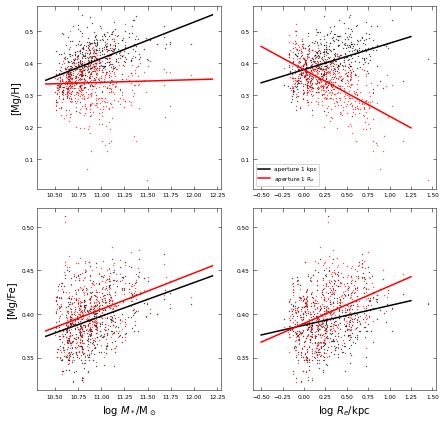

In [4]:
# plot of abundances vs stellar mass and effective size

fig, axs = plt.subplots(2, 2, figsize=(6.3,6), sharey='row')
markersize = 3
alpha = 0.2
linewidth = 1

def func(x, m, b):
    y = m*x + b
    return y

params = []
color = 'firebrick'

##### load data #######################################################################
fts = 'small'
ftss = 'xx-small'
lw = 0.5

with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    FeH_Re = f['FeH_Re'][:]
    MgFe_Re = f['MgFe_Re'][:]
    MgH_Re = f['MgH_Re'][:]
    FeH_1kpc = f['FeH_1kpc'][:]
    MgFe_1kpc = f['MgFe_1kpc'][:]
    MgH_1kpc = f['MgH_1kpc'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    OH_Re = f['OH_Re']
    OH_1kpc = f['OH_1kpc']
    OFe_Re = f['OFe_Re']
    OFe_1kpc = f['OFe_1kpc']
    FeH_gas_Re = f['FeH_gas_Re']
    FeH_gas_1kpc = f['FeH_gas_1kpc']
    OH_gas_Re = f['FeH_gas_Re']
    OH_gas_1kpc = f['FeH_gas_1kpc']
    percentile_age = f['percentile_age'][:]

starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) #-1.75)
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) #-1.75)


###### plot vs mass #####
ax1 = axs[0,0]
ax3 = axs[1,0]

# Mg/H
xx = np.linspace(10.4, 12.2)
optParam, pcov = curve_fit(func, total_mass[quiescent_selection], MgH_1kpc[quiescent_selection])
ax1.scatter(total_mass[quiescent_selection], MgH_1kpc[quiescent_selection], s=0.1, c='k')
ax1.plot(xx, func(xx, *optParam), c='k', label=r'1 kpc')

optParam, pcov = curve_fit(func, total_mass[quiescent_selection], MgH_Re[quiescent_selection])
ax1.scatter(total_mass[quiescent_selection], MgH_Re[quiescent_selection], s=0.1, c='r')
ax1.plot(xx, func(xx, *optParam), c='r', label=r'R$_e$')

ax1.set_ylabel(r'[Mg/H]')

# Mg/Fe
optParam, pcov = curve_fit(func, total_mass[quiescent_selection], MgFe_1kpc[quiescent_selection])
ax3.scatter(total_mass[quiescent_selection], MgFe_1kpc[quiescent_selection], s=0.1, c='k')
ax3.plot(xx, func(xx, *optParam), c='k')

optParam, pcov = curve_fit(func, total_mass[quiescent_selection], MgFe_Re[quiescent_selection])
ax3.scatter(total_mass[quiescent_selection], MgFe_Re[quiescent_selection], s=0.1, c='r')
ax3.plot(xx, func(xx, *optParam), c='r')

ax3.set_xlabel(r'log $M_*$/M$_\odot$')
ax3.set_ylabel(r'[Mg/Fe]')


###### plot vs Re #####

def func(x, m, b):
    y = m*x + b
    return y

ax1 = axs[0,1]
ax3 = axs[1,1]
#ax3 = axs[2,1]

# Mg/H
optParam, pcov = curve_fit(func, np.log10(halfmass_radius[quiescent_selection]), MgH_1kpc[quiescent_selection])
xx = np.linspace(-0.5, 1.25)
ax1.scatter(np.log10(halfmass_radius[quiescent_selection]), MgH_1kpc[quiescent_selection], s=0.1, c='k')
ax1.plot(xx, func(xx, *optParam), c='k', label=r'aperture 1 kpc')

optParam, pcov = curve_fit(func, np.log10(halfmass_radius[quiescent_selection]), MgH_Re[quiescent_selection])
xx = np.linspace(-0.5, 1.25)
ax1.scatter(np.log10(halfmass_radius[quiescent_selection]), MgH_Re[quiescent_selection], s=0.1, c='r')
ax1.plot(xx, func(xx, *optParam), c='r', label=r'aperture 1 R$_e$')

ax1.legend(loc=3, frameon=True, fontsize=ftss)

# Mg/Fe
optParam, pcov = curve_fit(func, np.log10(halfmass_radius[quiescent_selection]), MgFe_1kpc[quiescent_selection])
xx = np.linspace(-0.5, 1.25)
ax3.scatter(np.log10(halfmass_radius[quiescent_selection]), MgFe_1kpc[quiescent_selection], s=0.1, c='k')
ax3.plot(xx, func(xx, *optParam), c='k')

optParam, pcov = curve_fit(func, np.log10(halfmass_radius[quiescent_selection]), MgFe_Re[quiescent_selection])
xx = np.linspace(-0.5, 1.25)
ax3.scatter(np.log10(halfmass_radius[quiescent_selection]), MgFe_Re[quiescent_selection], s=0.1, c='r')
ax3.plot(xx, func(xx, *optParam), c='r')

ax3.set_yticks((0.35,0.4,0.45,0.5))
ax3.set_xlabel(r'log $R_e$/kpc')

######

plt.rcParams['axes.labelsize'] = fts
for bip in axs:
    for bop in bip:
        bop.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True, width=0.5)
        

for row in axs:
    for ax in row:
        ax.yaxis.set_tick_params(labelbottom=True)
        for side in ax.spines.keys(): 
            ax.spines[side].set_linewidth(0.5)
        
fig.tight_layout()

#plt.savefig('2022 FIGURES\z2_aperture_dependence.png', dpi=300, bbox_inches='tight')
plt.show()

# Radial Profiles
## Stellar Metallicity

In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars, stellar_density, gasmetals_density_profile, effective_yield, stellar_gas_densities, gasmetals_only, stellar_gas_metallicities, gas_mass, bimodal_check, starmetals_only, stellar_mass, get_stellar_age, gas_consumption

redshift = 2

In [2]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    OH_Re = f['OH_Re']
    OH_1kpc = f['OH_1kpc']
    OFe_Re = f['OFe_Re']
    OFe_1kpc = f['OFe_1kpc']
    FeH_gas_Re = f['FeH_gas_Re']
    FeH_gas_1kpc = f['FeH_gas_1kpc']
    OH_gas_Re = f['FeH_gas_Re']
    OH_gas_1kpc = f['FeH_gas_1kpc']

In [3]:
import warnings
warnings.filterwarnings('ignore')

starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) #-1.75)
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) #-1.75)

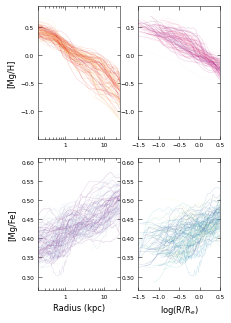

In [4]:
from matplotlib import colors
from random import randrange

#metallicity profiles
f, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(3.32, 4.6))
ax1 = axes[0][0]
ax2 = axes[0][1]
ax3 = axes[1][0]
ax4 = axes[1][1]
f.set_facecolor('w')
n_bins = 50
redshift = 2
fts = 'small'
ftss = 'xx-small'
lw = 0.5

colormap1 = plt.get_cmap('YlOrRd')
colormap2 = plt.get_cmap('RdPu')
colormap3 = plt.get_cmap('BuPu')
colormap4 = plt.get_cmap('YlGnBu')
norm = colors.Normalize(vmin=0, vmax=30)

for id in np.random.choice(ids[quiescent_selection], 100, replace=False):
    yy1, _, xx1, _ = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='hydrogen')
    yy2, _, xx2, _ = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='iron')
    Re = halfmass_radius[ids==id]

    number = randrange(30)
    color1 = colormap1(norm(number))
    color2 = colormap2(norm(number))
    color3 = colormap3(norm(number))
    color4 = colormap4(norm(number))
        
    ax1.plot(xx1, yy1, alpha = 0.2, linewidth=lw, color=color1)
    ax2.plot(np.log10(xx1/Re), yy1, alpha = 0.2, linewidth=lw, color=color2)
    ax3.plot(xx2, yy2, alpha = 0.2, linewidth=lw, color=color3)
    ax4.plot(np.log10(xx2/Re), yy2, alpha = 0.2, linewidth=lw, color=color4)

for row in axes:
    for ax in row:
        ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True, width=0.5)
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.yaxis.set_tick_params(labelbottom=True)

# formatting
ax1.set_xlim(0.2, 25)
ax1.set_ylabel('[Mg/H]', fontsize=fts)
ax1.set_xscale('log')
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['', '1', '10'])

ax2.set_xlim(-1.5, 0.5)

ax3.set_xlabel("Radius (kpc)", fontsize=fts)
ax3.set_ylabel('[Mg/Fe]', fontsize=fts)
ax3.set_xticklabels(['', '1', '10'])

ax4.set_xlabel("log(R/R$_e$)", fontsize=fts)




for ax in (ax1, ax2, ax3, ax4):
    for side in ax.spines.keys(): 
        ax.spines[side].set_linewidth(0.5)

f.tight_layout(w_pad=0.1)

plt.savefig('2022 FIGURES\profiles4.png', dpi=300)

plt.show()

## Effective Yield & Gas Consumption

In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars, stellar_density, gasmetals_density_profile, effective_yield, stellar_gas_densities, gasmetals_only, stellar_gas_metallicities, gas_mass, bimodal_check, starmetals_only, stellar_mass, get_stellar_age, gas_consumption

redshift = 2

In [2]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    OH_Re = f['OH_Re']
    OH_1kpc = f['OH_1kpc']
    OFe_Re = f['OFe_Re']
    OFe_1kpc = f['OFe_1kpc']
    FeH_gas_Re = f['FeH_gas_Re']
    FeH_gas_1kpc = f['FeH_gas_1kpc']
    OH_gas_Re = f['FeH_gas_Re']
    OH_gas_1kpc = f['FeH_gas_1kpc']

In [3]:
import warnings
warnings.filterwarnings('ignore')

starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) #-1.75)
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) #-1.75)

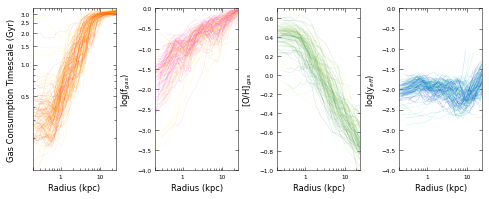

In [5]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie
from random import randrange

#metallicity profiles
f, (axes) = plt.subplots(1, 4, sharex='none', sharey='none', figsize=(6.9, 2.875), constrained_layout=True) #(24, 10)
ax3 = axes[0]
ax2 = axes[1]
ax4 = axes[2]
ax1 = axes[3]

f.set_facecolor('w')
n_bins = 50
fts = 'small'
ftss = 'xx-small'
vmin = 1.0
linewidth=0.5

colormap3 = plt.get_cmap('autumn')#('terrain')
colormap2 = plt.get_cmap('spring')#('gnuplot')
colormap4 = plt.get_cmap('summer')#('viridis')
colormap1 = plt.get_cmap('winter')#('magma')
norm = colors.Normalize(vmin=0, vmax=30)
colormap = plt.get_cmap('plasma')
norm_plasma = colors.Normalize(vmin=vmin, vmax=230)

xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(0, 1, 30)
metalbins = np.linspace(-0.8, 1, 30)
densitybins2 = np.linspace(1.5, 12, 20)

np.random.seed(0)

#z=2 star-forming galaxies
big_h3 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h4 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_y_eff = np.zeros(0)
big_R = np.zeros(0)
big_R_star = np.zeros(0)
big_f_gas = np.zeros(0)
big_gas = np.zeros(0)
big_OH_gas = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 100, replace=False):
    R, f_gas, y_eff, R_star = effective_yield(id=id, redshift=redshift, follow_stars=True)
    if type(R) == int:
        pass
    else:
        gas_con, _ = gas_consumption(id=id, redshift=redshift, follow_stars=True)
        OH_gas = gasmetals_only(id=id, redshift=redshift, num='oxygen', den='hydrogen', solar_units=True, follow_star=True)
        big_y_eff = np.concatenate((big_y_eff, np.log10(y_eff)), axis=None)
        big_R = np.concatenate((big_R, R), axis=None)
        big_R_star = np.concatenate((big_R_star, R_star), axis=None)
        big_f_gas = np.concatenate((big_f_gas, np.log10(f_gas)), axis=None)
        big_gas = np.concatenate((big_gas, gas_con*10**-9), axis=None)
        big_OH_gas = np.concatenate((big_OH_gas, OH_gas), axis=None)

        # calculate statistic for profile
        n_bins = 50
        percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
        for i in range(1, (n_bins+1)):
            percentiles[i] = np.percentile(R_star, (100/n_bins)*i)
        percentiles.sort()
        stat1, _, _ = scipy.stats.binned_statistic(R_star, np.log10(y_eff), 'median', bins=percentiles)
        stat2, _, _ = scipy.stats.binned_statistic(R_star, np.log10(f_gas), 'median', bins=percentiles)
        stat3, _, _ = scipy.stats.binned_statistic(R_star, gas_con*10**-9, 'median', bins=percentiles)
        stat4, _, _ = scipy.stats.binned_statistic(R_star, OH_gas, 'median', bins=percentiles)
        xx = percentiles[:-1]
        
        
        number = randrange(30)
        color1 = colormap1(norm(number))
        color2 = colormap2(norm(number))
        color3 = colormap3(norm(number))
        color4 = colormap4(norm(number))
        ax1.plot(xx[1:], stat1[1:], color=color1, alpha = 0.2, linewidth=linewidth)
        ax2.plot(xx[1:], stat2[1:], color=color2, alpha = 0.2, linewidth=linewidth)
        ax3.plot(xx[1:], stat3[1:], color=color3, alpha = 0.2, linewidth=linewidth)
        ax4.plot(xx[1:], stat4[1:], color=color4, alpha = 0.2, linewidth=linewidth)

for ax in axes:
    ax.set_xlim(0.2, 25)
    ax.set_xscale('log')
    ax.set_xticks([0.2, 1, 10], minor=False)
    ax.set_xticklabels(['', '1', '10'])
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5) #, labelsize=ftss
    ax.set_xlabel('Radius (kpc)', fontsize=fts)

# formatting
ax1.set_ylim(-4, 0)
ax1.set_ylabel("log(y$_{eff}$)", fontsize=fts)

ax2.set_ylim(-4, 0)
ax2.set_ylabel("log(f$_{gas}$)", fontsize=fts)

ax3.set_ylabel('Gas Consumption Timescale (Gyr)', fontsize=fts)
ax3.set_ylim(0.1, 3.4)
ax3.set_yscale('log')
ax3.set_yticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
ax3.set_yticklabels(['0.5', '1.0', '1.5', '2.0', '2.5', '3.0'])

ax4.set_ylabel('[O/H]$_{gas}$', fontsize=fts)
ax4.set_ylim(-1.0, 0.7)


for ax in axes:
    for side in ax.spines.keys(): 
        ax.spines[side].set_linewidth(0.5)


f.tight_layout(w_pad=0.4)


plt.savefig('2022 FIGURES/yeff.png', dpi=300, bbox_inches='tight')
plt.show()

## Gas vs. Stellar Metallicity

In [2]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars, stellar_density, gasmetals_density_profile, effective_yield, stellar_gas_densities, gasmetals_only, stellar_gas_metallicities, gas_mass, bimodal_check, starmetals_only, stellar_mass, get_stellar_age, gas_consumption

redshift = 2

In [3]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    OH_Re = f['OH_Re']
    OH_1kpc = f['OH_1kpc']
    OFe_Re = f['OFe_Re']
    OFe_1kpc = f['OFe_1kpc']
    FeH_gas_Re = f['FeH_gas_Re']
    FeH_gas_1kpc = f['FeH_gas_1kpc']
    OH_gas_Re = f['FeH_gas_Re']
    OH_gas_1kpc = f['FeH_gas_1kpc']

In [4]:
import warnings
warnings.filterwarnings('ignore')

starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) #-1.75)
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) #-1.75)

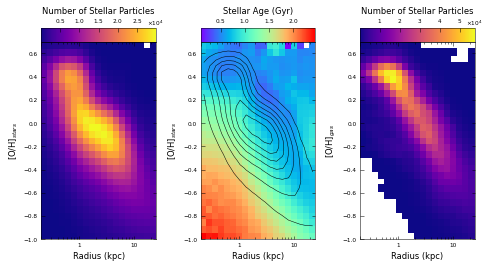

In [7]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie
from random import randrange
import matplotlib.ticker as mpltick

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(6.9, 3.83), constrained_layout=True)
ax3 = axes[1]
ax4 = axes[2]
ax1 = axes[0]

f.set_facecolor('w')
n_bins = 50
fts = 'small'
ftss = 'xx-small'
vmin = 1.0
lw = 0.5

colormap1 = plt.get_cmap('terrain')
colormap2 = plt.get_cmap('gnuplot')
norm = colors.Normalize(vmin=0, vmax=30)
colormap = plt.get_cmap('plasma')
norm_plasma = colors.Normalize(vmin=vmin, vmax=230)
colormap_age = plt.get_cmap('rainbow')
norm_age = colors.Normalize(vmin=0, vmax=2.5)

xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(0, 1, 30)
metalbins = np.linspace(-1.0, 0.7, 30)
densitybins2 = np.linspace(1.5, 12, 20)

xbins_new = (xbins[1:]+xbins[:-1])/2
metalbins_new = (metalbins[1:]+metalbins[:-1])/2

np.random.seed(0)

#z=2 star-forming galaxies
big_h3 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h4 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_y_eff = np.zeros(0)
big_R = np.zeros(0)
big_R_star = np.zeros(0)
big_f_gas = np.zeros(0)
big_OH_star = np.zeros(0)
big_OH_gas = np.zeros(0)
big_age = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 100, replace=False):
    R, f_gas, y_eff, R_star = effective_yield(id=id, redshift=redshift, follow_stars=True)
    if type(R) == int:
        pass
    else:
        OH_star = starmetals_only(id=id, redshift=redshift, num='oxygen', den='hydrogen')
        OH_gas = gasmetals_only(id=id, redshift=redshift, num='oxygen', den='hydrogen', solar_units=True, follow_star=True)
        age = get_stellar_age(id, redshift)
        big_age = np.concatenate((big_age, age), axis=None)
        big_R = np.concatenate((big_R, R), axis=None)
        big_R_star = np.concatenate((big_R_star, R_star), axis=None)
        big_OH_star = np.concatenate((big_OH_star, OH_star), axis=None)
        big_OH_gas = np.concatenate((big_OH_gas, OH_gas), axis=None)
        h3, xbins_h3, ybins_h3 = np.histogram2d(R_star, OH_star, bins=[xbins, metalbins], density=False)
        big_h3 += h3
        h4, _, _ = np.histogram2d(R_star, OH_gas, bins=[xbins, metalbins], density=False)
        big_h4 += h4

# panel 1
big_h3[big_h3==0] = np.nan
color=colormap(norm_plasma(big_h3)).tolist()
color = tuple(color[0][:])
im1 = ax1.pcolormesh(xbins, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
for ax in axes:
    ax.set_xlim(0.2, 25)
    ax.set_xscale('log')
    ax.set_xticks([0.2, 1, 10], minor=False)
    ax.set_xticklabels(['', '1', '10'])
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True, width=0.5)
    ax.set_xlabel("Radius (kpc)", fontsize=fts)
    ax.set_ylim(-1.0, 0.7)
    # skinny box edge
    for side in ax.spines.keys(): 
        ax.spines[side].set_linewidth(0.5)
ax1.set_ylabel('[O/H]$_{stars}$', fontsize=fts)

# panel 2
median_age, _, _, _ = stats.binned_statistic_2d(big_R_star, big_OH_star, big_age, statistic='median', bins=[xbins, metalbins])

color_age=colormap(norm_age(median_age)).tolist()
color_age = tuple(color_age[0][:])
im3 = ax3.pcolormesh(xbins, metalbins, median_age.T, cmap='rainbow', color=color_age, edgecolor=None)
ax3.contour(xbins_new, metalbins_new, big_h3.T, extent=[0.2, 25, -0.8, 1], linewidths=0.5, levels=7, colors='black') #extent=[xbins_h3[0], xbins_h3[-1], ybins_h3[0], ybins_h3[-1]], linewidths=2, levels=5, colors=color)
ax3.set_ylabel('[O/H]$_{stars}$', fontsize=fts)

# panel 3
big_h4[big_h4==0] = np.nan
color=colormap(norm_plasma(big_h4)).tolist()
color = tuple(color[0][:])
im4 = ax4.pcolormesh(xbins, metalbins, big_h4.T, cmap='plasma', color=color, edgecolor=None)
ax4.set_ylabel('[O/H]$_{gas}$', fontsize=fts)

# colorbar
ims = [im1, im3, im4]
cbar_labels = ['Number of Stellar Particles', 'Stellar Age (Gyr)', 'Number of Stellar Particles']
i = -1
for ax in axes:
    i += 1
    divider = make_axes_locatable(ax)
    fmt = mpltick.ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))
    cax = divider.append_axes("top", size="7%", pad=0.0)
    if i == 0:
        cbar = plt.colorbar(ims[i], cax=cax, format=fmt, orientation='horizontal', ticks=[5000, 10000, 15000, 20000, 25000])#, format='%.0e')
    else:
        cbar = plt.colorbar(ims[i], cax=cax, format=fmt, orientation='horizontal')
    cbar.outline.set_linewidth(0.5)
    if i in [0, 2]:
        cax.text(0.92, 1.2, r'$\times 10^4$', size=ftss, transform=cax.transAxes)
    cbar.set_label(cbar_labels[i], fontsize=fts, rotation=0, labelpad=-35)
    cbar.ax.tick_params(direction='in', labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=ftss, width=0.5)
    cbar.ax.xaxis.offsetText.set_visible(False)
    cbar.ax.yaxis.offsetText.set_visible(False)
    cbar.update_ticks()

f.tight_layout(w_pad=0.3)

# plt.savefig('2022 FIGURES\OHage_starforming.png', dpi=300, bbox_inches='tight')

# Discussion
## Closed-box Model

In [6]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars, stellar_density, gasmetals_density_profile, effective_yield, stellar_gas_densities, gasmetals_only, stellar_gas_metallicities, gas_mass, bimodal_check, starmetals_only, stellar_mass, get_stellar_age, gas_consumption

redshift = 2

In [7]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    OH_Re = f['OH_Re']
    OH_1kpc = f['OH_1kpc']
    OFe_Re = f['OFe_Re']
    OFe_1kpc = f['OFe_1kpc']
    FeH_gas_Re = f['FeH_gas_Re']
    FeH_gas_1kpc = f['FeH_gas_1kpc']
    OH_gas_Re = f['FeH_gas_Re']
    OH_gas_1kpc = f['FeH_gas_1kpc']

In [8]:
import warnings
warnings.filterwarnings('ignore')

starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3)
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3)

0-1 kpc
[Z_1] = 0.874
[Z_0] = -0.609
3-4 kpc
[Z_1] = 0.271
[Z_0] = -0.984
10-11 kpc
[Z_1] = -0.005
[Z_0] = -1.769


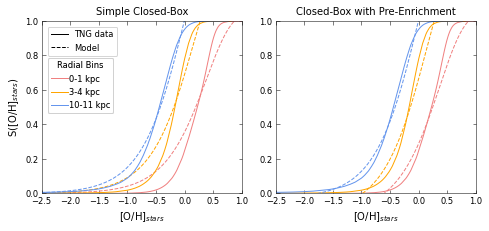

In [11]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie
from random import randrange
from dataclasses import dataclass
import scipy.optimize as opt

#metallicity profiles
f, axes = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(6.9, 3.312), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]

f.set_facecolor('w')
n_bins = 50
fts = 'medium'
ftss = 'small'
vmin = 1.0
lw = 1


@dataclass
class CDF:
    label: str
    color: str
    big_R_star: np.array = np.zeros(0)
    big_f_gas: np.array = np.zeros(0)
    big_OH_star: np.array = np.zeros(0)
    big_OH_gas: np.array = np.zeros(0)
            
ranges = [CDF(label='0-1 kpc', color='lightcoral'), CDF(label='3-4 kpc', color='orange'), CDF(label='10-11 kpc', color='cornflowerblue')]

np.random.seed(0)

#z=2 star-forming galaxies
big_R_star = np.zeros(0)
big_f_gas = np.zeros(0)
big_OH_star = np.zeros(0)
big_OH_gas = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 100, replace=False):
    R, f_gas, y_eff, R_star = effective_yield(id=id, redshift=redshift, follow_stars=True)
    if type(R) == int:
        pass
    else:
        OH_star = starmetals_only(id=id, redshift=redshift, num='oxygen', den='hydrogen')
        OH_gas = gasmetals_only(id=id, redshift=redshift, num='oxygen', den='hydrogen', solar_units=True, follow_star=True)
        selection = [(R_star<=1), (3<=R_star)&(R_star<=4), (10<=R_star)&(R_star<=11)]
        for i in range(len(selection)):
            radii = ranges[i]
            criteria = selection[i]
            OH_star_new = OH_star[criteria]
            f_gas_new = f_gas[criteria]
            OH_gas_new = OH_gas[criteria]
            radii.big_f_gas = np.concatenate((radii.big_f_gas, f_gas_new), axis=None)
            radii.big_OH_star = np.concatenate((radii.big_OH_star, OH_star_new), axis=None)
            radii.big_OH_gas = np.concatenate((radii.big_OH_gas, OH_gas_new), axis=None)

# closed-box with pre-enrichment
def func2(Z, Z0):
    S = (1 - mu1**((Z-Z0)/(Z1-Z0))) / (1 - mu1)
    return S

# simple closed box
def func1(Z, Z_gas):
    S = (1 - mu1**(Z/Z_gas)) / (1 - mu1)
    return S

Z1_array = [10**0.883, 10**0.264, 10**(-0.003)] 
idx = -1
plot_lines = []
for radii in ranges:
    idx += 1
    xx1 = np.sort(radii.big_OH_star)
    yy1 = np.array(range(len(radii.big_OH_star)))/len(radii.big_OH_star)
    line, = ax1.plot(xx1, yy1, '-', label=radii.label, linewidth=lw, color=radii.color)
    ax2.plot(xx1, yy1, '-', label=radii.label, linewidth=lw, color=radii.color)
    plot_lines.append(line)

    # model
    mu1 = np.median(radii.big_f_gas)
    med_OH_gas = np.median(radii.big_OH_gas)
    
    optParam1, pcov1 = opt.curve_fit(func1, 10**xx1, yy1, maxfev=5000)
    Z1 = optParam1
    
    if idx==2:
        optParam2, pcov2 = opt.curve_fit(func2, 10**xx1, yy1, maxfev=5000, bounds=([-np.inf, 1]), p0=0)
    else:
        optParam2, pcov2 = opt.curve_fit(func2, 10**xx1, yy1, maxfev=5000)
    
    ax1.plot(xx1, func1(10**xx1, *optParam1), '--', color=radii.color, linewidth=lw)
    ax2.plot(xx1, func2(10**xx1, *optParam2), '--', color=radii.color, linewidth=lw)
    print(radii.label)
    print('[Z_1] = %5.3f' % np.log10(optParam1))
    print('[Z_0] = %5.3f' % np.log10(optParam2))

for ax in axes:
    ax.set_xlim(-2.5, 1)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True, width=0.5)
    ax.set_ylim(0, 1)
    ax.set_xlabel('[O/H]$_{stars}$', fontsize=fts)
    # skinny box edge
    for side in ax.spines.keys(): 
        ax.spines[side].set_linewidth(0.5)
ax1.set_ylabel("S([O/H]$_{stars}$)", fontsize=fts)
ax1.set_title('Simple Closed-Box', fontsize=fts)
ax2.set_title('Closed-Box with Pre-Enrichment', fontsize=fts)

# legends
cdfline, = ax1.plot([-10, -11], [-10, -11], '-', color='black', linewidth=lw, label='TNG data')
modelline, = ax1.plot([-10, -11], [-10, -11], '--', color='black', linewidth=lw, label='Model')
legend1 = ax1.legend(handles=[cdfline, modelline], fontsize=ftss, loc='upper left', bbox_to_anchor=(0.01, 0.99))
legend2 = ax1.legend(title='Radial Bins', handles=plot_lines, fontsize=ftss, title_fontsize=ftss, handletextpad=0.1, loc='upper left',
                    bbox_to_anchor=(0.01, 0.81))
ax1.add_artist(legend1)
ax1.add_artist(legend2)


f.tight_layout()

# plt.savefig('2022 FIGURES\CDF_starforming_big.png', dpi=300)

1... 2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... 26... 27... 28... 29... 30... 31... 32... 33... 34... 35... 36... 37... 38... 39... 40... 41... 42... 43... 44... 45... 46... 47... 48... 49... 50... 51... 52... 53... 54... 55... 56... 57... 58... 59... 60... 61... 62... 63... 64... 65... 66... 67... 68... 69... 70... 71... 72... 73... 74... 75... 76... 77... 78... 79... 80... 81... 82... 83... 84... 85... 86... 87... 88... 89... 90... 91... 92... 93... 94... 95... 96... 97... 98... 99... 100... y = -0.1009x + -0.6163


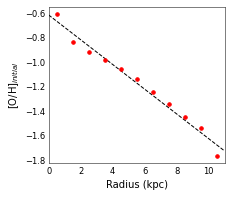

In [10]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie
from random import randrange
from dataclasses import dataclass
import scipy.optimize as opt
from scipy.interpolate import make_interp_spline, BSpline

#metallicity profiles
f, ax1 = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(3.32, 2.84), constrained_layout=True)

f.set_facecolor('w')
n_bins = 50
fts = 'medium'
ftss = 'small'
vmin = 1.0
lw = 1

@dataclass
class CDF:
    midpoint: float
    big_R_star: np.array = np.zeros(0)
    big_f_gas: np.array = np.zeros(0)
    big_OH_star: np.array = np.zeros(0)
    big_OH_gas: np.array = np.zeros(0)
            
ranges = [CDF(midpoint=0.5), CDF(midpoint=1.5), CDF(midpoint=2.5), CDF(midpoint=3.5), CDF(midpoint=4.5), CDF(midpoint=5.5), CDF(midpoint=6.5), CDF(midpoint=7.5), 
          CDF(midpoint=8.5), CDF(midpoint=9.5), CDF(midpoint=10.5)]

np.random.seed(0)

#z=2 star-forming galaxies
big_R_star = np.zeros(0)
big_f_gas = np.zeros(0)
big_OH_star = np.zeros(0)
big_OH_gas = np.zeros(0)
n = 0
for id in np.random.choice(ids[starforming_selection], 100, replace=False):
    n += 1
    print(n, end='... ') # to keep track of progress
    R, f_gas, y_eff, R_star = effective_yield(id=id, redshift=redshift, follow_stars=True)
    if type(R) == int:
        pass
    else:
        OH_star = starmetals_only(id=id, redshift=redshift, num='oxygen', den='hydrogen')
        OH_gas = gasmetals_only(id=id, redshift=redshift, num='oxygen', den='hydrogen', solar_units=True, follow_star=True)
        selection = [(R_star<=1), (1<=R_star)&(R_star<=2), (2<=R_star)&(R_star<=3), (3<=R_star)&(R_star<=4), (4<=R_star)&(R_star<=5), (5<=R_star)&(R_star<=6), (6<=R_star)&(R_star<=7), 
                     (7<=R_star)&(R_star<=8), (8<=R_star)&(R_star<=9), (9<=R_star)&(R_star<=10), (10<=R_star)&(R_star<=11)]
        for i in range(len(selection)):
            radii = ranges[i]
            criteria = selection[i]
            OH_star_new = OH_star[criteria]
            f_gas_new = f_gas[criteria]
            OH_gas_new = OH_gas[criteria]
            radii.big_f_gas = np.concatenate((radii.big_f_gas, f_gas_new), axis=None)
            radii.big_OH_star = np.concatenate((radii.big_OH_star, OH_star_new), axis=None)
            radii.big_OH_gas = np.concatenate((radii.big_OH_gas, OH_gas_new), axis=None)

# closed-box with pre-enrichment
def func2(Z, Z0):
    S = (1 - mu1**((Z-Z0)/(Z1-Z0))) / (1 - mu1)
    return S

# simple closed-box
def func1(Z, Z_gas):
    S = (1 - mu1**(Z/Z_gas)) / (1 - mu1)
    return S

Z1_array = [10**0.883, 10**0.264, 10**(-0.003)]
idx = -1
big_xx = []
big_yy = []
for radii in ranges:
    idx += 1

    # CDF
    xx1 = np.sort(radii.big_OH_star)
    yy1 = np.array(range(len(radii.big_OH_star)))/len(radii.big_OH_star)

    # model
    mu1 = np.median(radii.big_f_gas)
    med_OH_gas = np.median(radii.big_OH_gas)
    
    optParam1, pcov1 = opt.curve_fit(func1, 10**xx1, yy1, maxfev=5000)
    Z1 = optParam1
    
    if radii.midpoint==10.5:
        optParam2, pcov2 = opt.curve_fit(func2, 10**xx1, yy1, maxfev=5000, bounds=([-np.inf, 1]), p0=0)
    else:
        optParam2, pcov2 = opt.curve_fit(func2, 10**xx1, yy1, maxfev=5000)
        
    big_xx.append(radii.midpoint)
    big_yy.append(np.log10(optParam2))

    
# interpolate above data into smooth line
def func(x, m, b):
    y = m*x + b
    return y

xx_new = np.array([0, 11])

newbig_yy = []
for thing in big_yy:
    thing = float(thing)
    newbig_yy.append(thing)

optParam, pcov = curve_fit(func, big_xx, newbig_yy)
print('y = %5.4fx + %5.4f' %(optParam[0], optParam[1]))
ax1.plot(xx_new, func(xx_new, *optParam), '--', color='k', linewidth=lw)

ax1.plot(big_xx, newbig_yy, 'r.', markersize=7)

# yassify
ax1.set_xlim(0, 11)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True, width=0)
ax1.set_ylabel("[O/H]$_{initial}$", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)
for side in ax1.spines.keys(): 
        ax1.spines[side].set_linewidth(0.5)

f.tight_layout()

# plt.savefig('2022 FIGURES\CDF_Z0.png', dpi=300)

plt.show()

# Appendix

In [48]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy import table

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars, stellar_density, gasmetals_density_profile, effective_yield, stellar_gas_densities, gasmetals_only, stellar_gas_metallicities, gas_mass, bimodal_check, starmetals_only, stellar_mass, get_stellar_age, gas_consumption

redshift = 0.7

In [49]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    FeH_Re = f['FeH_Re'][:]
    MgFe_Re = f['MgFe_Re'][:]
    MgH_Re = f['MgH_Re'][:]
    FeH_1kpc = f['FeH_1kpc'][:]
    MgFe_1kpc = f['MgFe_1kpc'][:]
    MgH_1kpc = f['MgH_1kpc'][:]
    gas_mass_1kpc = f['gas_mass_1kpc'][:]
    stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
    percentile_age = f['percentile_age'][:]

In [50]:
import warnings
warnings.filterwarnings('ignore')

starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>-3) 
quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=-3) 

In [51]:
# credit: https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = colors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [52]:
# start with a dictionary
sample_template = {
    'name': 'galaxy_name       ',
    'redshift': np.nan,
    'logMstar': np.nan,
    'Re': np.nan,              # kpc
    'x_err': np.nan,
    'age': np.nan,              # Gyr
    'age_err': np.nan,
    '[Fe/H]': np.nan,
    '[Fe/H]_err': np.nan,
    '[Mg/Fe]': np.nan,
    '[Mg/Fe]_err': np.nan,
    '[Mg/H]': np.nan,
    '[Mg/H]_err': np.nan,
}

# convert each value to a list of 100 identical objects
for k, v in sample_template.items():
    sample_template[k] = [v]*100

# convert dictionary of lists to a Table object 
sample_template = table.Table(sample_template)


sample_template[0:5]

name,redshift,logMstar,Re,x_err,age,age_err,[Fe/H],[Fe/H]_err,[Mg/Fe],[Mg/Fe]_err,[Mg/H],[Mg/H]_err
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
galaxy_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
galaxy_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
galaxy_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
galaxy_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
galaxy_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [53]:
########################
# Beverage et al. (2021)
########################
# 67 galaxies

name = []
rredshift = []
logMstar = []
Re = []
age = []
age_err = []
FeH = []
FeH_err = []
MgFe = []
MgFe_err = []
MgH = []
MgH_err = []

with open('beverage21_legacDR2_results.dat', 'r') as f:
    next(f)
    for row in f:
        line=row.rstrip().split(' ')
#         line = [float(bang) for bang in bing[1:]]
        if float(line[3]) < 10.5:
            pass
        else:
            name.append(line[0])
            rredshift.append(float(line[1]))
            logMstar.append(float(line[3]))
            Re.append(float(line[6]))
            age.append(float(line[21]))
            age_err.append((float(line[22])+float(line[23])/2))
            FeH.append(float(line[9]))
            FeH_err.append((float(line[10])+float(line[11])/2))
            MgFe.append(float(line[15]))
            MgFe_err.append((float(line[16])+float(line[17])/2))
            MgH.append(float(line[12]))
            MgH_err.append((float(line[13])+float(line[14])/2))
        
bev21 = sample_template[0:len(name)].copy()
bev21.meta['label'] = 'z~0.7 (Beverage et al. 2021)'

bev21['name'] = name
bev21['redshift'] = rredshift 
bev21['logMstar'] = logMstar
bev21['Re'] = Re 
bev21['x_err'] = np.full(len(name), 0.1)
bev21['age'] = 10**np.array(age) 
bev21['age_err'] = 10**np.array(age_err) 
bev21['[Fe/H]'] = FeH
bev21['[Fe/H]_err'] = FeH_err
bev21['[Mg/Fe]'] = MgFe
bev21['[Mg/Fe]_err'] = MgFe_err
bev21['[Mg/H]'] = MgH
bev21['[Mg/H]_err'] = MgH_err

# print out table
bev21

name,redshift,logMstar,Re,x_err,age,age_err,[Fe/H],[Fe/H]_err,[Mg/Fe],[Mg/Fe]_err,[Mg/H],[Mg/H]_err
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
M10_187035,0.6178,10.8601,4.3386,0.1,8.13392193567162,1.1019198334508078,-0.4203,0.03855,0.333,0.0337,-0.0882,0.04775
M10_213772,0.7004,11.6928,7.3291,0.1,7.301296749459656,1.0916916788093647,-0.1732,0.0435,0.1084,0.02915,-0.0623,0.049550000000000004
M10_218656,0.6183,10.8536,2.6266,0.1,8.120822162499834,1.1780127744628046,-0.4795,0.08255,0.3169,0.0637,-0.1633,0.0761
M10_219083,0.7054,11.0723,6.3296,0.1,5.8156732771851445,1.1485502481999437,-0.2938,0.061149999999999996,0.3068,0.0615,0.0128,0.09040000000000001
M10_225441,0.6823,10.6554,0.7695,0.1,2.1325538179462007,1.0693010665477825,-0.1586,0.0576,0.2401,0.04995,0.0831,0.06835
M10_227672,0.6093,10.6166,3.542,0.1,5.001496854402788,1.2139477653658286,-0.3443,0.07225,0.3348,0.0664,-0.0144,0.1046
M10_228380,0.6114,11.1953,6.7543,0.1,7.950601750844197,1.0987528131180708,-0.428,0.0403,0.3113,0.03455,-0.1166,0.04325
M10_230983,0.6961,10.9875,4.0335,0.1,5.3777424596344225,1.4055619763755018,-0.1792,0.1227,0.2368,0.0743,0.0474,0.14295
M10_231544,0.6548,10.8046,2.2791,0.1,3.627438014764578,1.157310784094042,-0.1353,0.0594,0.2985,0.04819999999999999,0.162,0.06795


In [54]:
########################
# Carnall et al. (2021)
########################
# dozens of galaxies at z~1.15

carn21 = sample_template[0:1].copy()
carn21.meta['label'] = 'z~1.15 (Carnall et al. 2021)'

carn21['name'] = 'MRG-M0138'
carn21['redshift'] = 1.15
carn21['logMstar'] = 11.05
carn21['Re'] = None # not found in paper
carn21['x_err'] = 0.1
carn21['age'] = None
carn21['age_err'] = None
carn21['[Fe/H]'] = -0.18
carn21['[Fe/H]_err'] = 0.08
carn21['[Mg/Fe]'] = 0.23
carn21['[Mg/Fe]_err'] = 0.12
carn21['[Mg/H]'] = carn21['[Mg/Fe]'] + carn21['[Fe/H]']
carn21['[Mg/H]_err'] = np.sqrt( carn21['[Mg/Fe]_err']**2 + carn21['[Fe/H]_err']**2 )

# print out table
carn21

name,redshift,logMstar,Re,x_err,age,age_err,[Fe/H],[Fe/H]_err,[Mg/Fe],[Mg/Fe]_err,[Mg/H],[Mg/H]_err
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
MRG-M0138,1.15,11.05,nan,0.1,nan,nan,-0.18,0.08,0.23,0.12,0.05000000000000002,0.14422205101855956


In [55]:
# set the marker properties for the plots
elinewidth = 1

carn21.meta['color'] = 'black' #'mediumblue'
carn21.meta['markersize'] = 8
carn21.meta['marker'] = 'p'
carn21.meta['alpha'] = 0.8
carn21.meta['zorder'] = 100
carn21.meta['elinewidth'] = elinewidth

bev21.meta['color'] = 'mediumpurple'#'darkgray'
bev21.meta['markersize'] = 6
bev21.meta['markeredgecolor'] = 'white'
bev21.meta['marker'] = 'H'
bev21.meta['alpha'] = 0.8
bev21.meta['elinewidth'] = elinewidth-0.5

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'

# put samples together
samples = [carn21, bev21] 

# this one is to suppress the line connecting points
for s in samples:
    s.meta['linestyle'] = ''

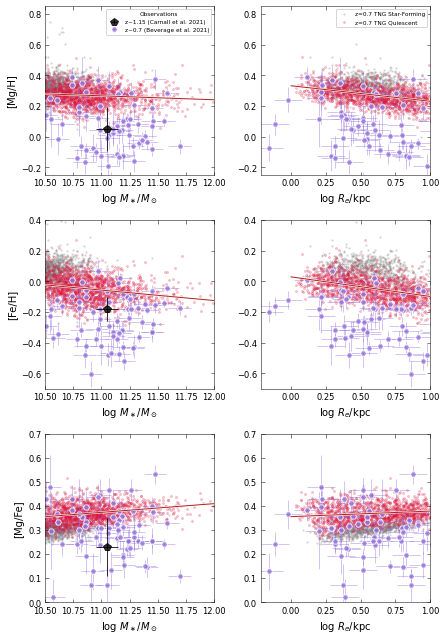

In [41]:
import matplotlib.patheffects as pe

# plot of abundances vs stellar mass and effective size

fig, axs = plt.subplots(3, 2, figsize=(6.3,9), sharey='row')
markersize = 3
alpha = 0.2
linewidth = 1

def func(x, m, b):
    y = m*x + b
    return y

params = []
color2 = 'firebrick'
color3 = 'darkslateblue'
color1 = 'crimson'
lw = 1

patheffects = [pe.Stroke(linewidth=2, foreground='w'), pe.Normal()]

##### STELLAR MASS #######################################################################

# [Mg/Fe]
##########

# z=2 galaxies
axs[2][0].plot(total_mass[starforming_selection], MgFe_Re[starforming_selection], '.', color='gray',
           alpha=alpha, label='z='+str(redshift)+' TNG Star-Forming', markersize=markersize, zorder=0)
axs[2][0].plot(total_mass[quiescent_selection], MgFe_Re[quiescent_selection], '.', color=color1,
           alpha=alpha, label='z='+str(redshift)+' TNG Quiescent', markersize=markersize+1, zorder=1)

xx2 = np.array([10.5, 12])
xx3 = np.array([10.5, 11.8])
#fit line
optParam, pcov = curve_fit(func, total_mass[quiescent_selection], MgFe_Re[quiescent_selection])
axs[2][0].plot(xx2, func(xx2, *optParam), '-', color=color2, linewidth=lw, zorder=1000, path_effects=patheffects)


# observations
obsarray = []
for s in samples:
    thing = axs[2][0].errorbar(s['logMstar'], s['[Mg/Fe]'], xerr=s['x_err'], yerr=s['[Mg/Fe]_err'], **s.meta)
    obsarray.append(thing)
    
axs[2][0].set(xlabel=r'log $M_\ast/M_\odot$', ylabel='[Mg/Fe]',
      ylim=[0, 0.7], xlim=[10.5, 12])



# [Fe/H]
##########

# z=2 galaxies
axs[1][0].plot(total_mass[starforming_selection], FeH_Re[starforming_selection], '.', color='gray',
           alpha=alpha, markersize=markersize, zorder=0)
axs[1][0].plot(total_mass[quiescent_selection], FeH_Re[quiescent_selection], '.', color=color1,
           alpha=alpha, markersize=markersize+1, zorder=1)

#fit line
optParam, pcov = curve_fit(func, total_mass[quiescent_selection], FeH_Re[quiescent_selection])
axs[1][0].plot(xx2, func(xx2, *optParam), '-', color=color2, linewidth=lw, zorder=1000, path_effects=patheffects)


# observations
for s in samples:
    axs[1][0].errorbar(s['logMstar'], s['[Fe/H]'], xerr=s['x_err'], yerr=s['[Fe/H]_err'], **s.meta)

axs[1][0].set(xlabel=r'log $M_\ast/M_\odot$', ylabel='[Fe/H]',
      ylim=[-0.7, 0.4], xlim=[10.5, 12])


# [Mg/H]
##########

# z=2 galaxies
axs[0][0].plot(total_mass[starforming_selection], MgH_Re[starforming_selection], '.', color='gray',
           label='z='+str(redshift)+' TNG Star-Forming', alpha=alpha, markersize=markersize, zorder=0)
axs[0][0].plot(total_mass[quiescent_selection], MgH_Re[quiescent_selection], '.', color=color1,
           label='z='+str(redshift)+' TNG Quiescent', alpha=alpha, markersize=markersize+1, zorder=1)

#fit line
optParam, pcov = curve_fit(func, total_mass[quiescent_selection], MgH_Re[quiescent_selection])
axs[0][0].plot(xx2, func(xx2, *optParam), '-', color=color2, linewidth=lw, zorder=1000, path_effects=patheffects)

# observations
for s in samples:
    axs[0][0].errorbar(s['logMstar'], s['[Mg/H]'], xerr=s['x_err'], yerr=s['[Mg/H]_err'], **s.meta)

axs[0][0].set(xlabel=r'log $M_\ast/M_\odot$', ylabel='[Mg/H]',
      ylim=[0.85-1.1, 0.85], xlim=[10.5, 12])


##### EFFECTIVE SIZE ########################################################################

# [Mg/Fe]
##########

# z=2 galaxies
axs[2][1].plot(np.log10(halfmass_radius[starforming_selection]), MgFe_Re[starforming_selection], '.', color='gray', 
            alpha=alpha, label='z='+str(redshift)+' TNG Star-Forming', markersize=markersize, zorder=0)
axs[2][1].plot(np.log10(halfmass_radius[quiescent_selection]), MgFe_Re[quiescent_selection], '.', color=color1, 
            alpha=alpha, label='z='+str(redshift)+' TNG Star-Forming', markersize=markersize+1, zorder=1)

xx3 = np.array([-0.22, 1.0])
xx2 = np.array([0.0, 1.0])
#fit line
optParam, pcov = curve_fit(func, np.log10(halfmass_radius[quiescent_selection]), MgFe_Re[quiescent_selection])
axs[2][1].plot(xx2, func(xx2, *optParam), '-', color=color2, linewidth=lw, zorder=1000, path_effects=patheffects)



# observations
for s in samples:
    axs[2][1].errorbar(np.log10(s['Re']), s['[Mg/Fe]'], xerr=s['x_err'], yerr=s['[Mg/Fe]_err'], **s.meta)

axs[2][1].set(xlabel=r'log $R_e$/kpc', ylabel=None,
      ylim=[0, 0.7], xlim=[-0.22, 1.0])



# [Fe/H]
##########

# z=2 galaxies
axs[1][1].plot(np.log10(halfmass_radius[starforming_selection]), FeH_Re[starforming_selection], '.', color='gray', 
            alpha=alpha, markersize=markersize, zorder=0)
axs[1][1].plot(np.log10(halfmass_radius[quiescent_selection]), FeH_Re[quiescent_selection], '.', color=color1,
            alpha=alpha, markersize=markersize+1, zorder=1)

#fit line
optParam, pcov = curve_fit(func, np.log10(halfmass_radius[quiescent_selection]), FeH_Re[quiescent_selection])
axs[1][1].plot(xx2, func(xx2, *optParam), '-', color=color2, linewidth=lw, zorder=1000, path_effects=patheffects)


# observations
for s in samples:
    axs[1][1].errorbar(np.log10(s['Re']), s['[Fe/H]'], xerr=s['x_err'], yerr=s['[Fe/H]_err'], **s.meta)

axs[1][1].set(xlabel=r'log $R_e$/kpc', ylabel=None,
      ylim=[-0.7, 0.4], xlim=[-0.22, 1.0])


# [Mg/H]
##########
otharray = []
# z=2 galaxies
tngsf, = axs[0][1].plot(np.log10(halfmass_radius[starforming_selection]), MgH_Re[starforming_selection], '.', color='gray', 
            label='z='+str(redshift)+' TNG Star-Forming', alpha=alpha, markersize=markersize, zorder=0)
tngq, = axs[0][1].plot(np.log10(halfmass_radius[quiescent_selection]), MgH_Re[quiescent_selection], '.', color=color1, 
            label='z='+str(redshift)+' TNG Quiescent', alpha=alpha, markersize=markersize+1, zorder=1)

#fit line
optParam, pcov = curve_fit(func, np.log10(halfmass_radius[quiescent_selection]), MgH_Re[quiescent_selection])
line1, = axs[0][1].plot(xx2, func(xx2, *optParam), '-', color=color2, linewidth=lw, zorder=1000, path_effects=patheffects,
                       label='z=0.7 Relation')

otharray.append(tngsf)
otharray.append(tngq)

# observations
for s in samples:
    axs[0][1].errorbar(np.log10(s['Re']), s['[Mg/H]'], xerr=s['x_err'], yerr=s['[Mg/H]_err'], **s.meta)

axs[0][1].set(xlabel=r'log $R_e$/kpc', ylabel=None,
      ylim=[0.85-1.1, 0.85], xlim=[-0.22, 1.0])

plt.rcParams['axes.labelsize'] = fts
for bip in axs:
    for bop in bip:
        bop.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True, width=0.5)
        
# legend
axs[0][0].legend(title='Observations', handles=[obsarray[0], obsarray[1]], title_fontsize=ftsss, loc='upper right', fontsize=ftsss).set_zorder(200)
axs[0][1].legend(handles=[otharray[0], otharray[1]], loc='upper right', fontsize=ftsss).set_zorder(200) 

for row in axs:
    for ax in row:
        ax.yaxis.set_tick_params(labelbottom=True)
        for side in ax.spines.keys(): 
            ax.spines[side].set_linewidth(0.5)
        
fig.tight_layout()

# plt.savefig('2022 FIGURES\z0p7_bigcheddar.png', dpi=300, bbox_inches='tight')
plt.show()

In [56]:
# new marker properties
carn21.meta['color'] = 'black'

bev21.meta['color'] = 'darkgray'
bev21.meta['markersize'] = 9
bev21.meta['markeredgecolor'] = 'white'

# put samples together
samples = [carn21, bev21] 

# this one is to suppress the line connecting points
for s in samples:
    s.meta['linestyle'] = ''

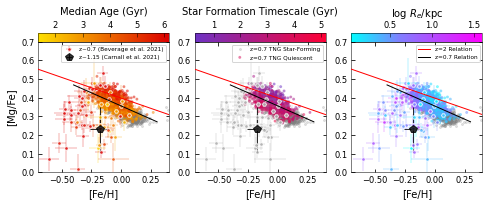

In [68]:

# [Mg/Fe] vs [Fe/H]
####################
fig, axes = plt.subplots(1, 3, figsize=(6.9, 2.95), sharey='row')
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

samples = carn21
for s in samples:
    s.meta['linestyle'] = ''

def func(x, m, b):
    y = m*x + b
    return y

markersize = 4
alpha = 0.2

### MEDIAN AGE ########
vmin_med = min(median_age[quiescent_selection])
vmax_med = max(median_age[quiescent_selection])
hexlist = ['#ffe200', '#dd0000']
colormap_med = get_continuous_cmap(hexlist)
norm_med = colors.Normalize(vmin=vmin_med, vmax=vmax_med)
color_med = colormap_med(norm_med(median_age[quiescent_selection]))

### 90 - 10 AGE ########
vmin_age = min(percentile_age[quiescent_selection])
vmax_age = max(percentile_age[quiescent_selection])
hexlist = ['#6d33c6', '#Ff0036']# '#fb2047']
colormap_age = get_continuous_cmap(hexlist)
norm_age = colors.Normalize(vmin=vmin_age, vmax=vmax_age)
color_age = colormap_age(norm_age(percentile_age[quiescent_selection]))

### EFFECTIVE SIZE #####
radius_quiescent = np.log10(np.array(halfmass_radius[quiescent_selection]))
vmin_r = min(radius_quiescent)
vmax_r = max(radius_quiescent)
vcenter = np.median(radius_quiescent)
colormap_r = plt.get_cmap('cool')
norm_r = colors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin_r, vmax=vmax_r)
color_r = colormap_r(norm_r(radius_quiescent))

colormaps = [colormap_med, colormap_age, colormap_r]
colorlist = [color_med, color_age, color_r]
normlist = [norm_med, norm_age, norm_r]
cbar_labels = ['Median Age (Gyr)', 'Star Formation Timescale (Gyr)', 'log $R_e$/kpc']

#model fit
optParam, pcov = curve_fit(func, FeH_Re[quiescent_selection], MgFe_Re[quiescent_selection])
param = np.array([-0.22162942,  0.39764619]) # z=2
xx = np.array([-0.7, 0.4])
xx2 = np.array([-0.4, 0.3])
xx3 = np.array([-0.65, 0.2])

models = []
points = []
i = -1
for ax in axes:
    i += 1
    # plot TNG markers
    point1, = ax.plot(FeH_Re[starforming_selection], MgFe_Re[starforming_selection], '.', color='gray',
               alpha=alpha, label='z='+str(redshift)+' TNG Star-Forming', markersize=markersize, zorder=0)
    point2 = ax.scatter(FeH_Re[quiescent_selection], MgFe_Re[quiescent_selection], marker='.', cmap=colormaps[i], c=colorlist[i],
               alpha=alpha+0.2, label='z='+str(redshift)+' TNG Quiescent', s=(markersize)**2, zorder=1)
    points.append(point1)
    points.append(point2)

    # plot models
    line1, = ax.plot(xx, func(xx, *param), '-', color='r', linewidth=1, label='z=2 Relation', zorder=50000)
    line2, = ax.plot(xx2, func(xx2, *optParam), '-', color='k', linewidth=1, label='z=0.7 Relation', zorder=50000)
    models.append(line1)
    models.append(line2)

    # observations
    if i == 1:
        point = ax.errorbar(bev21['[Fe/H]'], bev21['[Mg/Fe]'], xerr=bev21['[Fe/H]_err'], yerr=bev21['[Mg/Fe]_err'], linestyle='',
                        color='darkgray', markersize=markersize, marker='H', alpha=0.8, zorder=100, label='z~0.7 (Beverage et al. 2021)', markeredgecolor='white',
                           elinewidth=0.4)
        points.append(point)
    else:
        if i == 0:
            quantity = bev21['age']
        else:
            quantity = np.log10(bev21['Re'])
        b21color_all = colormaps[i](normlist[i](quantity))

        b21color = []
        for row in b21color_all:
            b21color.append(tuple(row))
        for m in range(len(bev21)):
            thing = ax.errorbar(bev21['[Fe/H]'][m], bev21['[Mg/Fe]'][m], xerr=bev21['[Fe/H]_err'][m], yerr=bev21['[Mg/Fe]_err'][m], linestyle='',
                        color=b21color[m], markersize=markersize, marker='H', alpha=0.8, zorder=100, label='z~0.7 (Beverage et al. 2021)', markeredgecolor='white',
                       elinewidth=0.4)
            if m==0:
                points.append(thing)
    for s in samples:
        point = ax.errorbar(s['[Fe/H]'], s['[Mg/Fe]'], xerr=s['[Fe/H]_err'], yerr=s['[Mg/Fe]_err'], **s.meta)
        points.append(point)
    
    # labels
    if i==0:
        ax.set(xlabel='[Fe/H]', ylabel='[Mg/Fe]',
              ylim=[0.0, 0.7], xlim=[-0.7, 0.4])
    else:
        ax.set(xlabel='[Fe/H]', ylabel=None,
              ylim=[0.0, 0.7], xlim=[-0.7, 0.4])
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
    ax.yaxis.set_tick_params(labelbottom=True)
    
     # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="7%", pad=0.0)
    sm = plt.cm.ScalarMappable(cmap=colormaps[i], norm=normlist[i])
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')#, format=fmt)#, format='%.0e')
    cbar.outline.set_linewidth(0.5)
    cbar.set_label(cbar_labels[i], rotation=0, labelpad=-35)#, fontsize='medium')
    cbar.ax.tick_params(direction='in', labeltop=True, labelbottom=False, top=True, bottom=False, labelsize='small', width=0.5)
    if i==2:
        cbar.set_ticks([0.5, 1.0, 1.5])
        cbar.set_ticklabels(['0.5', '1.0', '1.5'])

# legend
ax1.legend(handles=[points[2], points[3]], fontsize=ftsss, loc='upper right').set_zorder(200)
ax2.legend(handles=[points[4], points[5]], fontsize=ftsss, loc='upper right').set_zorder(200)
ax3.legend(handles=[models[0], models[1]], fontsize=ftsss, loc='upper right').set_zorder(200)

for ax in axes:
    for side in ax.spines.keys():  
        ax.spines[side].set_linewidth(0.5)
        
fig.tight_layout(w_pad=0.9)

# plt.savefig('2022 FIGURES\z0p7_MgFeFeH_three_fullcolor.png', dpi=200, bbox_inches='tight')
plt.show()